# Aplicación del Modelo Regresión Linear

## Importación de librerías

In [25]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Carga del DATASET

In [26]:
df = pd.read_csv(r'C:\Users\Frode\Documents\Cursos\Skillstech\WALMARTSALESFORECASTING\Dataset\Walmart_Store_sales.csv', encoding = 'utf-8')

## Preprocesamiento de los Datos

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [29]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


Eliminación de Outliers

In [31]:
# Dropping outliers     
df_clean = df[(df['Unemployment']<=10.5) & (df['Unemployment']>=4.7) & (df['Temperature']>=9)]
df_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


## Preparacion del Modelo

In [32]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


## Separación de Datos en Train y Test

In [33]:
X = df_clean[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = df_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

## Ajuste y aplicación del modelo

In [34]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

## Definición de métricas a evaluar

In [35]:
mape = metrics.mean_absolute_percentage_error(Y_test, Y_pred).round(4)
mae = metrics.mean_absolute_error(Y_test, Y_pred).round(4)
mse = metrics.mean_squared_error(Y_test, Y_pred).round(4)
r2 = r2_score(Y_test, Y_pred).round(4)

## Resultados del modelo

Linear Regression:

Train_Accuracy: 12.881999830539359
Test_Accuracy: 12.068299223081047


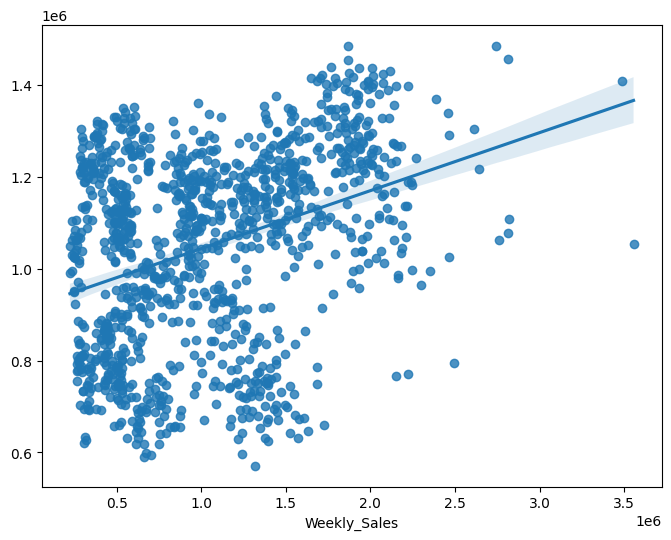

In [36]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Train_Accuracy:',reg.score(X_train, Y_train)*100)
print('Test_Accuracy:',r2_score(Y_test, Y_pred)*100)

#sns.scatterplot(x=Y_pred,y=Y_test)
#plt.figure(figsize=(7,5), dpi=75)
sns.regplot(x=Y_test,y=Y_pred)

import warnings
warnings.filterwarnings('ignore')

In [37]:
print(f"MAPE: {(mape)*(100)}%")
print(f"MAE: {(mae)}")
print(f"MSE: {(mse)}")
print(f"R2: {(r2)}")

MAPE: 73.68%
MAE: 516622.7435
MSE: 389001348887.0608
R2: -0.161
